In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path="../code/data/"

Idea for different Parameters:

  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
    
* -N 10000 -d 0.1 -f 144 -a 

In [3]:
import docker
from io import StringIO

client = docker.from_env()
client.containers.list()
container=client.containers.get("datalab_s22")
container.attach()

def generate_source(N,sigma,amplitude,freq=0,deltaT=1,phase=0):
    filename = "N=%s-s=%s-d=%s-f=%s-a=%s-p=%s" % (N ,sigma, deltaT, freq, amplitude, phase)
    container.exec_run("/home/generate_source -N %s -s %s -d %s -f %s -a %s -p %s -o %s" % (N ,sigma, deltaT, freq, amplitude, phase, "/home/data/out_"+filename))
    return pd.read_csv(path+"out_"+filename,delimiter=' ',header=None)

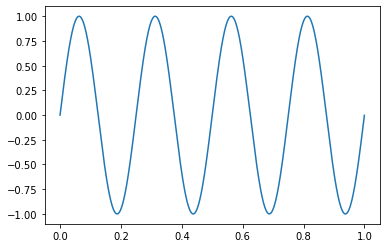

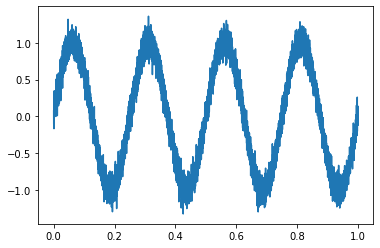

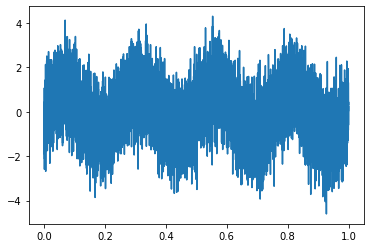

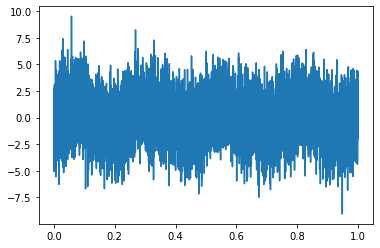

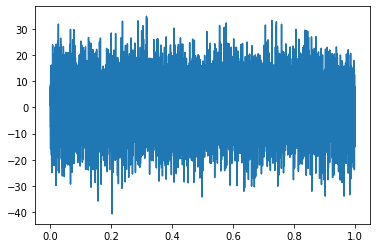

In [4]:
for i in [0,0.1,1,2,10]:
    data=generate_source(10000,i,1,4,0.0001)
    plt.plot(data[0],data[1])
    plt.show()

In [5]:
def analysis(N,sigma,amplitude,freq=0,deltaT=1,phase=0,freq_prober=0,method=3):
    filename = "N=%s-s=%s-d=%s-f=%s-a=%s-p=%s" % (N ,sigma, deltaT, freq, amplitude, phase)
    container.exec_run("/home/generate_source -N %s -s %s -d %s -f %s -a %s -p %s -o %s" % (N ,sigma, deltaT, freq, amplitude, phase, "/home/data/out_"+filename))
    out = container.exec_run("/home/prober -i %s -o %s -f %s -p %s -m %s" % ("home/data/out_"+filename ,"home/data/prober_"+filename, freq_prober, phase, method))
    data=pd.read_csv(path+"out_"+filename,delimiter=' ',header=None)
    plt.plot(data[0],data[1])
    plt.show()
    if method==3:
        prober=pd.read_csv(path+"prober_"+filename,delimiter=' ',header=None)
        plt.plot(prober[0],prober[2])
        plt.show()
    else: 
        print(str(out[1],'utf-8'))

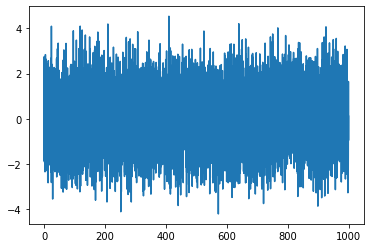

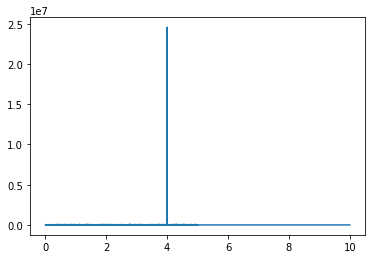

In [6]:
analysis(10000,1,1,4,0.1)

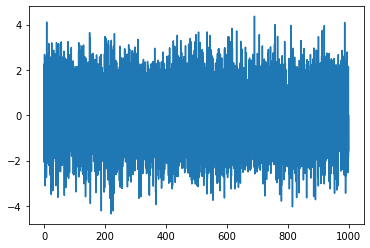

4 0 0.501671



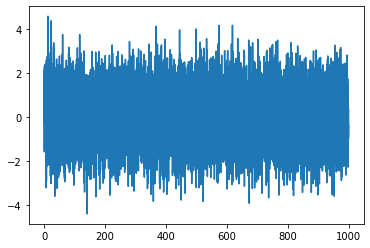

10 0 -0.000345224



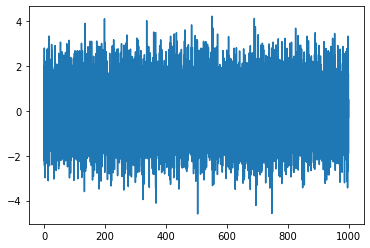

40 0 -0.0014108



In [7]:
analysis(10000,1,1,4,0.1,freq_prober=4,method=1)
analysis(10000,1,1,4,0.1,freq_prober=10,method=1)
analysis(10000,1,1,4,0.1,freq_prober=40,method=1)

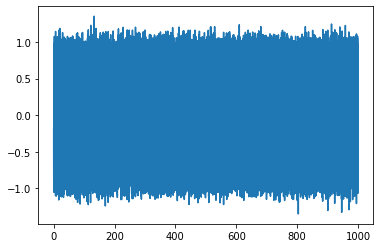

4 0 0.500589



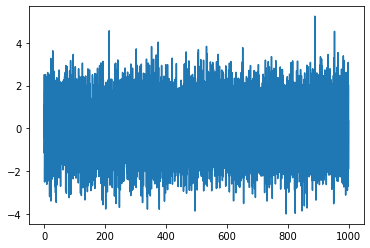

4 0 0.492035



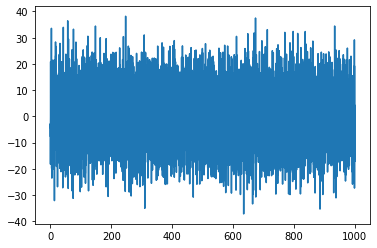

4 0 0.520326



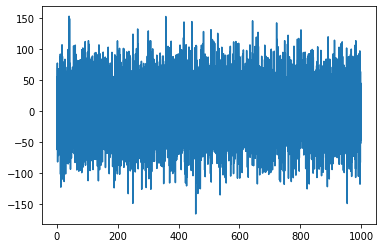

4 0 1.01734



In [8]:
analysis(10000,0.1,1,4,0.1,freq_prober=4,method=1)
analysis(10000,  1,1,4,0.1,freq_prober=4,method=1)
analysis(10000,10,1,4,0.1,freq_prober=4,method=1)
analysis(10000,40,1,4,0.1,freq_prober=4,method=1)

In [24]:
def prober(N,sigma,amplitude,freq=0,deltaT=1,phase=0,freq_prober=0,method=3):
    filename = "N=%s-s=%s-d=%s-f=%s-a=%s-p=%s" % (N ,sigma, deltaT, freq, amplitude, phase)
    return container.exec_run("/home/prober -i %s -o %s -f %s -p %s -m %s" % ("home/data/out_"+filename ,"home/data/prober_"+filename, freq_prober, phase, method))

In [19]:
def method_one(N,sigma,amplitude,freq=0,deltaT=1,phase=0):
    prober_return = [str(prober(N,sigma,amplitude,freq,deltaT,freq_prober=i*0.99,method=1).output,'utf-8').split() for i in range(20,200)]
    return pd.DataFrame(prober_return,dtype=float)

In [11]:
def method_two(N,sigma,amplitude,freq=0,deltaT=1,phase=0):
    prober_return = [str(prober(N,sigma,amplitude,freq,deltaT,freq_prober=i*0.07,method=2).output,'utf-8').split() for i in range(10,100)]
    return pd.DataFrame(prober_return,dtype=float)

In [21]:
def method_three(N,sigma,amplitude,freq=0,deltaT=1,phase=0):
    filename = "N=%s-s=%s-d=%s-f=%s-a=%s-p=%s" % (N ,sigma, deltaT, freq, amplitude, phase)
    prober(N,sigma,amplitude,freq,deltaT,method=3)
    prober=pd.read_csv(path+"prober_"+filename,delimiter=' ',header=None)
    return prober

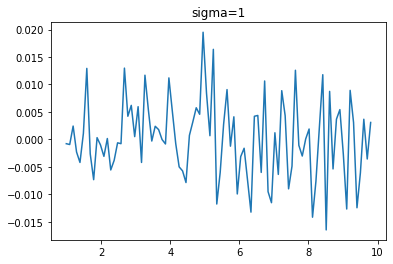

Frequency: 4
Best Frequency: 4.95
Mismatch: 0.9025000000000003


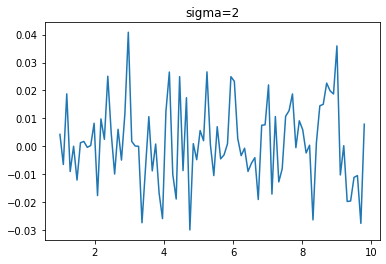

Frequency: 4
Best Frequency: 2.97
Mismatch: 1.0608999999999995


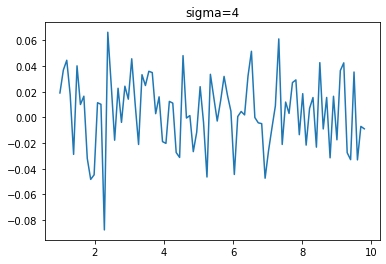

Frequency: 4
Best Frequency: 2.376
Mismatch: 2.637376


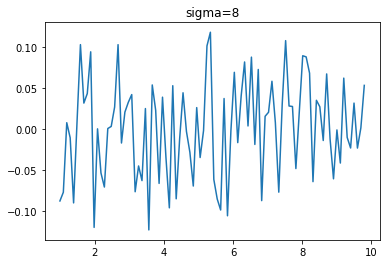

Frequency: 4
Best Frequency: 5.346
Mismatch: 1.8117160000000003


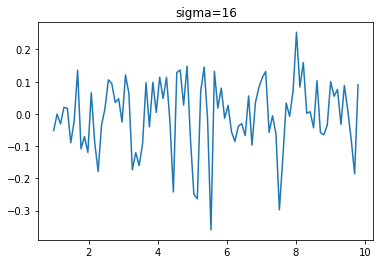

Frequency: 4
Best Frequency: 8.019
Mismatch: 16.152361000000003


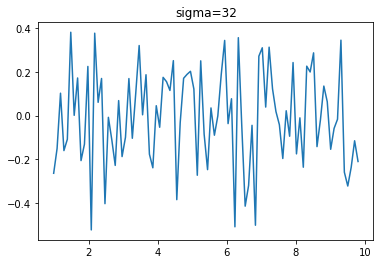

Frequency: 4
Best Frequency: 1.485
Mismatch: 6.325224999999999


In [12]:
for i in range(0,6):
    generate_source(10000,2**i,1,4,0.1,0)
    df = method_one(10000,2**i,1,4,0.1,0)
    max_freq = df[0][df[2].idxmax(0)]
    plt.plot(df[0],df[2])
    plt.title('sigma=' + str(2**i))
    plt.show()
    print('Frequency: '+str(4))
    print('Best Frequency: '+str(max_freq))
    print('Mismatch: ' + str((4-max_freq)**2))

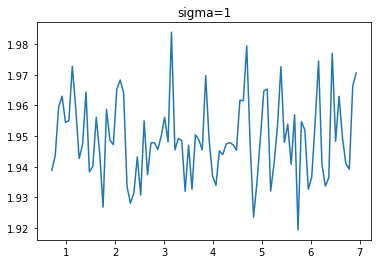

Frequency: 4
Best Frequency: 5.74
Mismatch: 3.027600000000001


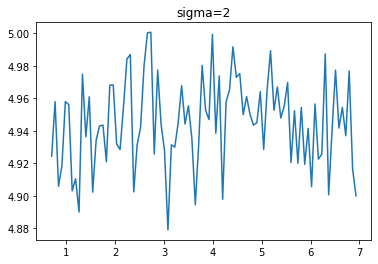

Frequency: 4
Best Frequency: 3.08
Mismatch: 0.8463999999999998


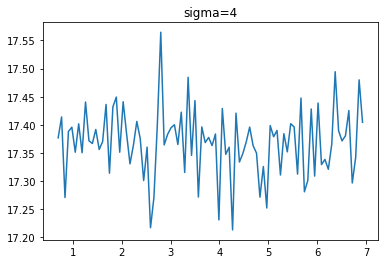

Frequency: 4
Best Frequency: 4.27
Mismatch: 0.07289999999999977


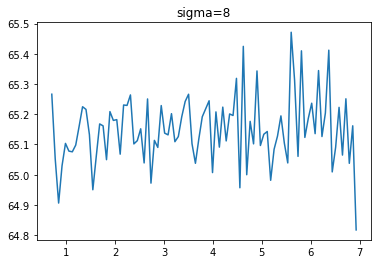

Frequency: 4
Best Frequency: 6.93
Mismatch: 8.584899999999998


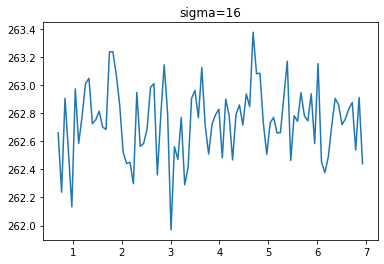

Frequency: 4
Best Frequency: 3.01
Mismatch: 0.9801000000000004


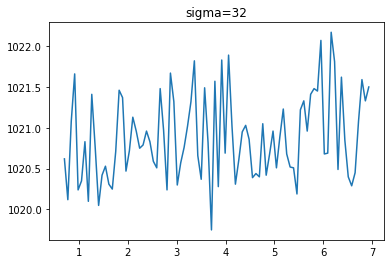

Frequency: 4
Best Frequency: 3.71
Mismatch: 0.08410000000000002


In [13]:
for i in range(0,6):
    generate_source(10000,2**i,1,4,0.1,0)
    df = method_two(10000,2**i,1,4,0.1,0)
    min_freq = df[0][df[2].idxmin(0)]
    plt.plot(df[0],df[2])
    plt.title('sigma=' + str(2**i))
    plt.show()
    print('Frequency: '+str(4))
    print('Best Frequency: '+str(min_freq))
    print('Mismatch: ' + str((4-min_freq)**2))

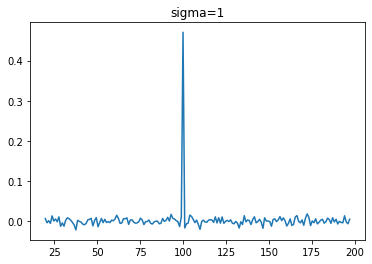

Frequency: 100
Best Frequency: 99.99
Mismatch: 0.00010000000000010231


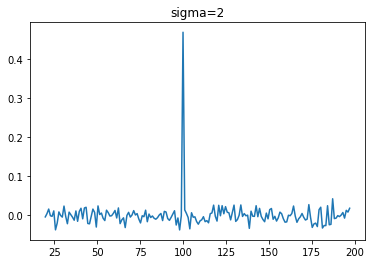

Frequency: 100
Best Frequency: 99.99
Mismatch: 0.00010000000000010231


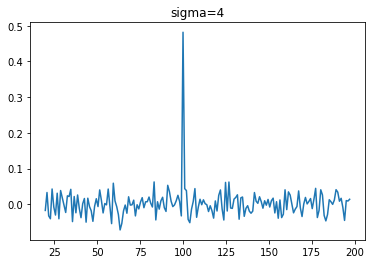

Frequency: 100
Best Frequency: 99.99
Mismatch: 0.00010000000000010231


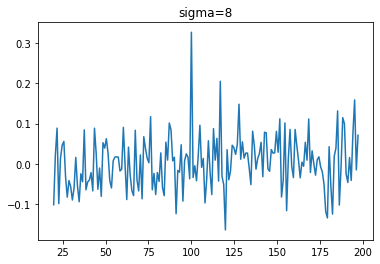

Frequency: 100
Best Frequency: 99.99
Mismatch: 0.00010000000000010231


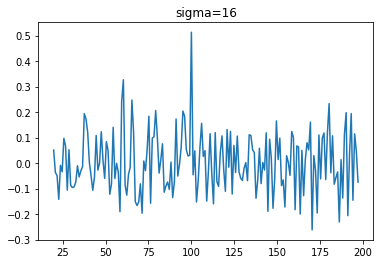

Frequency: 100
Best Frequency: 99.99
Mismatch: 0.00010000000000010231


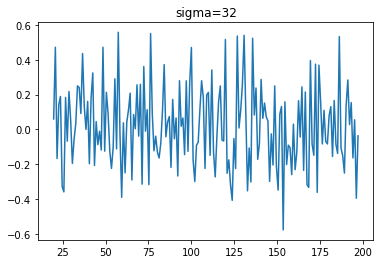

Frequency: 100
Best Frequency: 57.42
Mismatch: 1813.0564


In [20]:
for i in range(0,6):
    generate_source(10000,2**i,1,100,0.001,0)
    df = method_one(10000,2**i,1,100,0.001,0)
    max_freq = df[0][df[2].idxmax(0)]
    plt.plot(df[0],df[2])
    plt.title('sigma=' + str(2**i))
    plt.show()
    print('Frequency: '+str(100))
    print('Best Frequency: '+str(max_freq))
    print('Mismatch: ' + str((100-max_freq)**2))

**Find Amplitude, Phase and Frequency of an unknown signal.**

In [70]:
def method_three(N,sigma,amplitude,freq=0,deltaT=1,phase=0):
    filename = "N=%s-s=%s-d=%s-f=%s-a=%s-p=%s" % (N ,sigma, deltaT, freq, 1, 0)
    prober(N,sigma,amplitude,freq,deltaT,method=3)
    result=pd.read_csv(path+"prober_"+filename,delimiter=' ',header=None)
    plt.plot(result[0],result[2])
    plt.show()
    return result

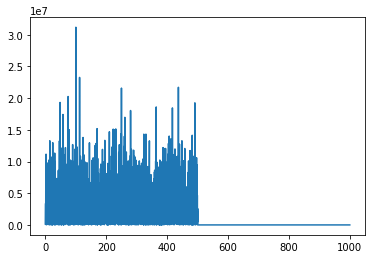

,0,1,2
0,0.0,0,115150.0
1,0.1,0,856901.0
2,0.2,0,689164.0
3,0.3,0,978461.0
4,0.4,0,1155120.0
...,...,...,...
9995,999.5,0,0.0
9996,999.6,0,0.0
9997,999.7,0,0.0
9998,999.8,0,0.0


In [29]:
method_three(10000,16,1,100,0.001,0)

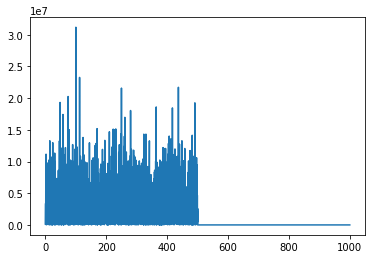

In [30]:
df = method_three(10000,16,1,100,0.001,0)
freq  = df[0][df[2].idxmax(0)]

In [76]:
freq

100.0

In [53]:
def prober(N,sigma,amplitude,freq=0,deltaT=1,phase=0,freq_prober=0,method=3):
    filename = "N=%s-s=%s-d=%s-f=%s-a=%s-p=%s" % (N ,sigma, deltaT, freq, 1, 0)
    return container.exec_run("/home/prober -i %s -o %s -f %s -p %s -m %s" % ("home/data/out_"+filename ,"home/data/prober_"+filename, freq_prober, phase, method))

In [34]:
def method_two(N,sigma,amplitude,freq=0,deltaT=1,phase=0,freq_prober=0):
    prober_return = [str(prober(N,sigma,amplitude,freq,deltaT,phase=i/100*2*np.pi,freq_prober=freq_prober,method=2).output,'utf-8').split() for i in range(0,100)]
    return pd.DataFrame(prober_return,dtype=float)

In [38]:
temp = method_two(10000,16,1,100,0.001,0,freq)

In [74]:
temp

,0,1,2
0,100.0,0.000000,256.730
1,100.0,0.062832,256.723
2,100.0,0.125664,256.723
3,100.0,0.188496,256.725
4,100.0,0.251327,256.732
...,...,...,...
95,100.0,5.969030,256.825
96,100.0,6.031860,256.797
97,100.0,6.094690,256.774
98,100.0,6.157520,256.755


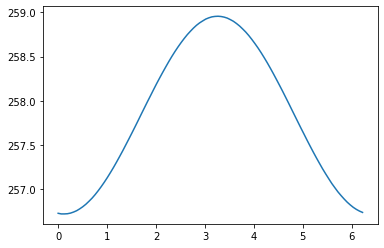

In [42]:
plt.plot(temp[1],temp[2])

In [45]:
phi  = temp[1][temp[2].idxmin(0)]

In [46]:
phi

0.0628319

In [50]:
def method_one(N,sigma,amplitude,freq=0,deltaT=1,phase=0,freq_prober=0):
    prober_return = [str(prober(N,sigma,i,freq,deltaT,phase=phase,freq_prober=freq_prober,method=1).output,'utf-8').split() for i in range(0,10)]
    return pd.DataFrame(prober_return,dtype=float)

In [63]:
temp2= method_one(10000,16,1,100,0.001,phi,freq)

In [77]:
temp2

,0,1,2
0,100.0,0.062832,0.557641
1,100.0,0.062832,0.557641
2,100.0,0.062832,0.557641
3,100.0,0.062832,0.557641
4,100.0,0.062832,0.557641
5,100.0,0.062832,0.557641
6,100.0,0.062832,0.557641
7,100.0,0.062832,0.557641
8,100.0,0.062832,0.557641
9,100.0,0.062832,0.557641


In [64]:
temp2[2][0]*2

1.115282

In [72]:
def find_signal(sf,sa,sphi):
    #generate_source()
    df = method_three(10000,16,sa,sf,0.001,sphi)
    freq  = df[0][df[2].idxmax(0)]
    df = method_two(10000,16,1,100,0.001,0,freq)    
    phi  = df[1][df[2].idxmin(0)]
    df = method_one(10000,16,1,100,0.001,phi,freq)    
    ampl = df[2][0]*2
    return freq,phi,ampl

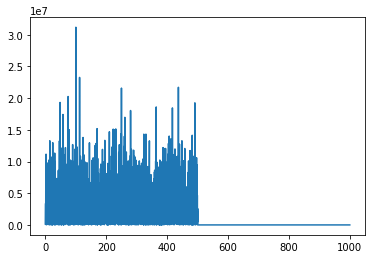

(100.0, 0.0628319, 1.115282)

In [73]:
find_signal()